In [1]:
%matplotlib inline

import numpy as np
import matplotlib. pyplot as plt

In [2]:
# 讀入 Tensorflow

In [3]:
import tensorflow as tf

### 1. 讀入 MINSIT 數據集

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

### 2. 欣賞數據集內容

In [6]:
len(x_train)


60000

In [7]:
len(x_test)

10000

In [8]:
n=9487

In [9]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
y_train[n]

1

### 3. 資料整理

In [11]:
np.array([3,78,95,99])/100


array([0.03, 0.78, 0.95, 0.99])

In [12]:
x_train=x_train/255
x_test=x_test/255

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
28*28

784

In [15]:
x_train=x_train.reshape(60000,784)

In [16]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
len(x_test)

10000

In [18]:
x_test=x_test.reshape(10000,784)

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_train=to_categorical(y_train,10)

In [21]:
y_test=to_categorical(y_test,10)

In [22]:
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 4. 打造神經網路

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [25]:
model=Sequential()

In [26]:
#打造一台函數學習機 
#Sequential(打開函數學習機) Dense(fully)/model 名字可以自己訂

In [27]:
model.add(Dense(87,input_dim=784,activation='relu'))


In [28]:
#一層層把神經網路加上 設計87個神經元 784維 activation fun是誰

In [29]:
model.add(Dense(87,activation='relu'))

In [30]:
model.add(Dense(10,activation='softmax'))

In [31]:
#輸出 (不用再relu因為輸入跟輸出一樣)
#softmax 把數字變成0-1且加起來變成1

 4. 組裝我們的神經網路

In [32]:
model.compile(loss='mse',optimizer=SGD(lr=0.087),metrics=['accuracy'])

In [33]:
#兩個(正確答案&輸出)都是向量 算兩個向量間的距離平方(才不用處理誤差值)
#loss function / mse 把誤差值再平均 /lr=learninf rate/metrics=看訓練過程中正確率多少

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 87)                68295     
_________________________________________________________________
dense_1 (Dense)              (None, 87)                7656      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                880       
Total params: 76,831
Trainable params: 76,831
Non-trainable params: 0
_________________________________________________________________


In [35]:
784*87+87

68295

In [36]:
#784個輸入(輸入層)和87個神經元(隱藏層)每個都有連接，且每個神經元都有偏值(共87個)
#=68295個參數要調

5. 開始訓練神經網路

In [37]:
model.fit(x_train,y_train,batch_size=100,epochs=20)


Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 142us/sample - loss: 0.0812 - accuracy: 0.3508
Epoch 2/20
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0518 - accuracy: 0.6593
Epoch 3/20
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0309 - accuracy: 0.8376
Epoch 4/20
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0225 - accuracy: 0.8725
Epoch 5/20
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0190 - accuracy: 0.8866
Epoch 6/20
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0171 - accuracy: 0.8948
Epoch 7/20
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0159 - accuracy: 0.9011
Epoch 8/20
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0150 - accuracy: 0.9058
Epoch 9/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0143 - accuracy: 0.9099
Epoch 10/20

In [38]:
#batch_size:做了一些就調參數 每100次調一次
#epochs:總共調20次

6. 訓練成果

In [39]:
result=model.predict_classes(x_test)

In [40]:
#把所有都訓練預測一下
#predict_classes：但希望不要所有輸出值都給我，希望直接看到最可能的答案

In [41]:
result[9487]


2

神經網路預測是 2


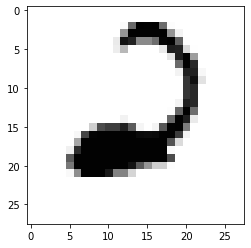

In [42]:
n=9487
print('神經網路預測是',result[n])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')

In [43]:
#方法一
#reshape：剛剛已經拉平，所以要還原成矩陣

In [44]:
def show_predict(n):
  print('神經網路說是:',result[n])
  plt.imshow(x_test[n].reshape(28,28),cmap='Greys')

In [45]:
#方法二
#def:寫成一個函數 每次輸入我要的資料n再print出來

神經網路說是: 6


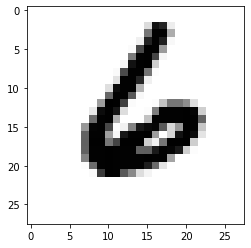

In [47]:
show_predict(8888)